# Commodity price forecasting - Baseline models

- Naive
- Seasonal naive
- Random walk with drift

In [1]:
library(readr)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(xts)
library(fpp2)
library(forecast)
library(DMwR)
library(Metrics)
library(hydroGOF)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last

Loading required package: forecast
Loading required package: fma
Loading required package: expsmooth
Loading required package: lattice
Loading required package: grid

Attaching package: ‘DMwR’

The following object is masked from ‘package:fma’:

    sales


Attaching package: ‘Metrics’

The following object is masked from ‘package:forecast’:

    accuracy


Attaching package: ‘hydroGOF’

The following objects are masked from ‘package:Metrics’:

    mae, ms

In [2]:
options(repr.plot.width=8, repr.plot.height=3)

## 1. Data import and analysis

In [3]:
data <- read.csv("data/gold-silver.csv", sep=';')
head(data)

Date,gold,silver
1993/11/01,369.25,4.25
1993/12/01,376.30,4.62
1994/01/01,394.00,5.24
1994/02/01,384.50,5.31
1994/03/01,378.75,5.32
1994/04/01,391.00,5.78


In [4]:
gold <- ts(data$gold, start = c(1993, 11), frequency = 12)
silver <- ts(data$silver, start = c(1993, 11), frequency = 12)

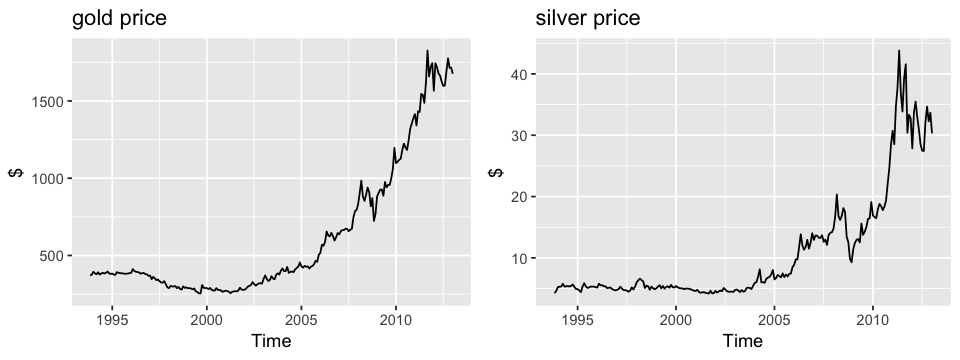

In [5]:
p1 <- ggplot2::autoplot(gold) + ggtitle('gold price') + ylab('$')
p2 <- ggplot2::autoplot(silver) + ggtitle('silver price') + ylab('$')

gridExtra::grid.arrange(p1, p2, ncol=2)

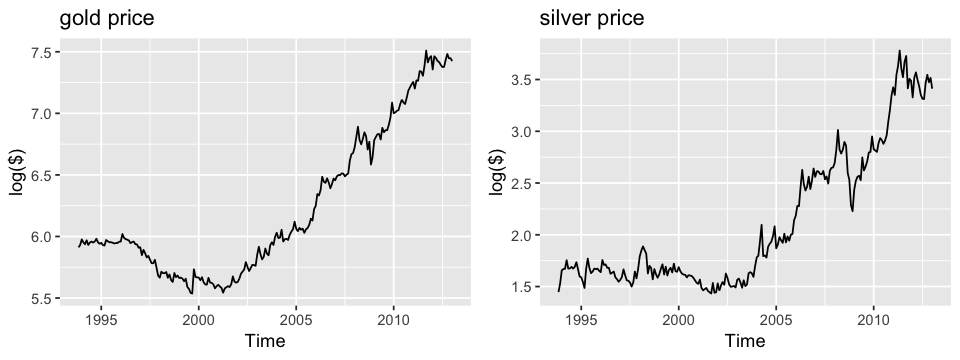

In [6]:
p3 <- ggplot2::autoplot(log(gold)) + ggtitle('gold price') + ylab('log($)')
p4 <- ggplot2::autoplot(log(silver)) + ggtitle('silver price') + ylab('log($)')

gridExtra::grid.arrange(p3, p4, ncol=2)

In [7]:
nrow(data)

[1] 231

## 2. Train test split

In [8]:
test_size <- as.numeric(12)
train_size <- length(gold) - test_size

train_gold <- head(gold, train_size)
test_gold <- tail(gold, test_size)

train_silver <- head(silver, train_size)
test_silver <- tail(silver, test_size)

## 3. Evaluation function

In [9]:
model_evaluation <- function(model, frcst, train, test){
        
        train_pred <- fitted(model)
        test_pred <- frcst$mean

        train_rmse <- sqrt(mse(train, train_pred))
        train_mae <- mae(train, train_pred)
        train_nrmse <- train_rmse/sd(train)

        test_rmse <- sqrt(mse(test, test_pred))
        test_mae <- mae(test, test_pred)
        test_nrmse <- test_rmse/sd(test)

        print(paste0('Training NRMSE :', round(train_nrmse, 3)))
        print(paste0('Training MAE :', round(train_mae, 3)))

        print(paste0('Test NRMSE :', round(test_nrmse, 3)))
        print(paste0('Test MAE :', round(test_mae, 3)))
    }

## 4. Naive forecasting

[1] "Training NRMSE :0.108"
[1] "Training MAE :22.287"
[1] "Test NRMSE :2.308"
[1] "Test MAE :116.66"


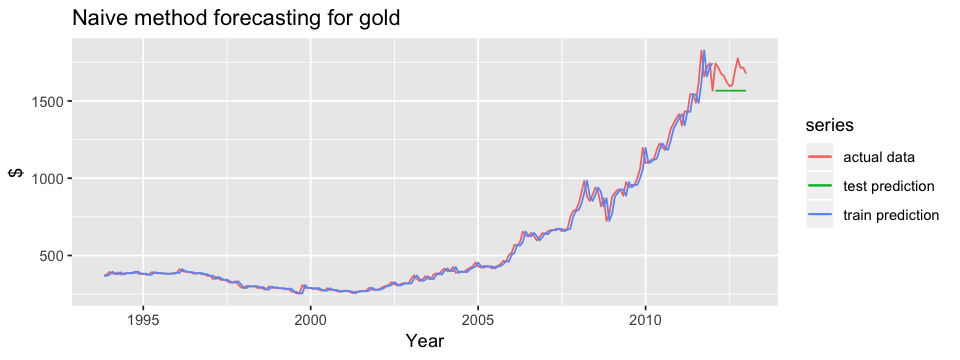

In [10]:
## naive forecasting for gold
naive_model <- Arima(train_gold, order = c(0, 1, 0))

# multi-step forecasting
naive_frcst <- forecast(naive_model, h = 12)

model_evaluation(naive_model, naive_frcst, train_gold, test_gold)

autoplot(gold, series = 'actual data') +
    autolayer(fitted(naive_model), series = 'train prediction') +
    autolayer(naive_frcst$mean, series = 'test prediction') +
    xlab('Year') +
    ylab('$') +
    ggtitle('Naive method forecasting for gold')

[1] "Training NRMSE :0.194"
[1] "Training MAE :0.78"
[1] "Test NRMSE :1.683"
[1] "Test MAE :3.905"


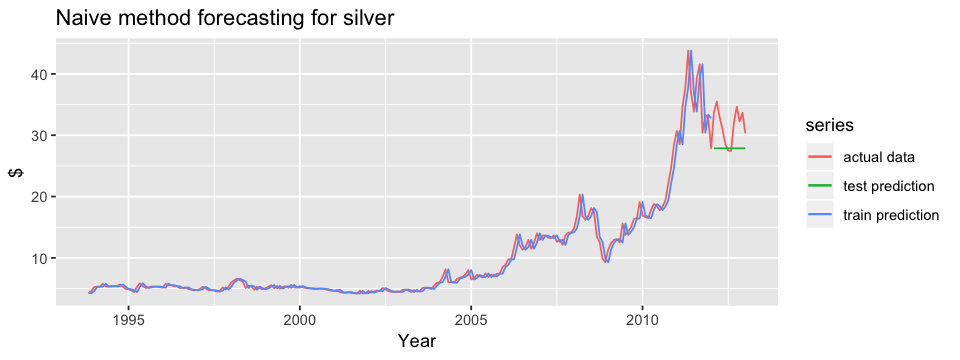

In [11]:
## naive forecasting for gold
naive_model <- Arima(train_silver, order = c(0, 1, 0))

# multi-step forecasting
naive_frcst <- forecast(naive_model, h = 12)

model_evaluation(naive_model, naive_frcst, train_silver, test_silver)

autoplot(silver, series = 'actual data') +
    autolayer(fitted(naive_model), series = 'train prediction') +
    autolayer(naive_frcst$mean, series = 'test prediction') +
    xlab('Year') +
    ylab('$') +
    ggtitle('Naive method forecasting for silver')

## 5. Seasonal naive forecasting

[1] "Training NRMSE :0.361"
[1] "Training MAE :81.374"
[1] "Test NRMSE :3.215"
[1] "Test MAE :138.43"


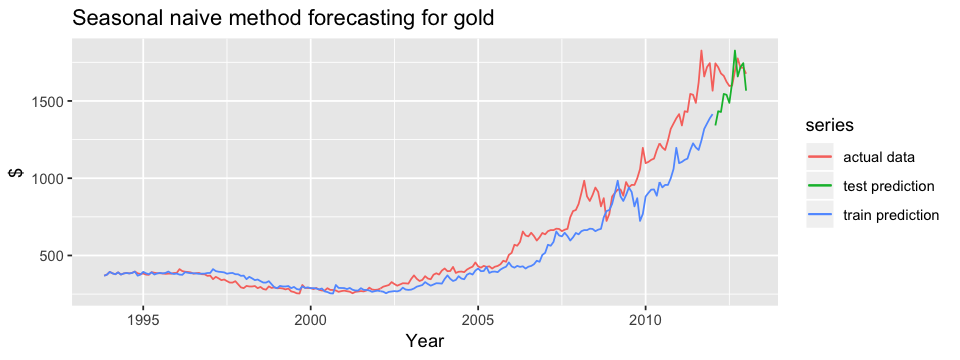

In [12]:
## seasonal naive forecasting for gold
snaive_model <- Arima(train_gold, order = c(0, 0, 0), seasonal = list(order = c(0, 1, 0)))

# multi-step forecasting
snaive_frcst <- forecast(snaive_model, h = 12)

model_evaluation(snaive_model, snaive_frcst, train_gold, test_gold)

autoplot(gold, series = 'actual data') +
    autolayer(fitted(snaive_model), series = 'train prediction') +
    autolayer(snaive_frcst$mean, series = 'test prediction') +
    xlab('Year') +
    ylab('$') +
    ggtitle('Seasonal naive method forecasting for gold')

[1] "Training NRMSE :0.582"
[1] "Training MAE :2.325"
[1] "Test NRMSE :2.557"
[1] "Test MAE :5.695"


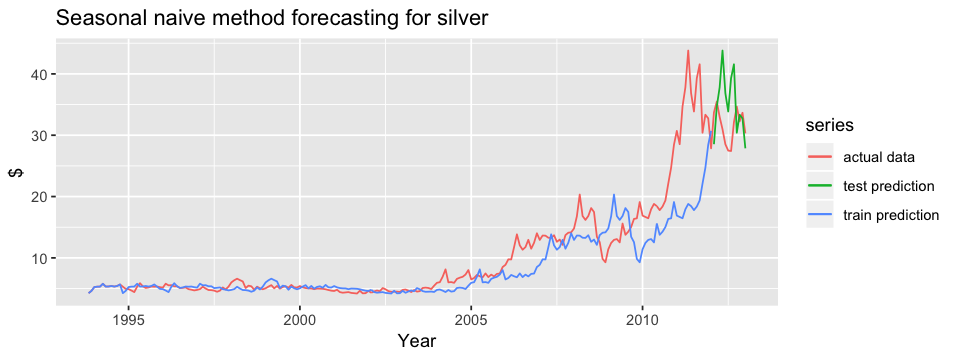

In [14]:
## seasonal naive forecasting for silver
snaive_model <- Arima(train_silver, order = c(0, 0, 0), seasonal = list(order = c(0, 1, 0)))

# multi-step forecasting
snaive_frcst <- forecast(snaive_model, h = 12)

model_evaluation(snaive_model, snaive_frcst, train_silver, test_silver)

autoplot(silver, series = 'actual data') +
    autolayer(fitted(snaive_model), series = 'train prediction') +
    autolayer(snaive_frcst$mean, series = 'test prediction') +
    xlab('Year') +
    ylab('$') +
    ggtitle('Seasonal naive method forecasting for silver')

## 6. Random walk with drift

[1] "Training NRMSE :0.107"
[1] "Training MAE :22.643"
[1] "Test NRMSE :1.766"
[1] "Test MAE :82.222"


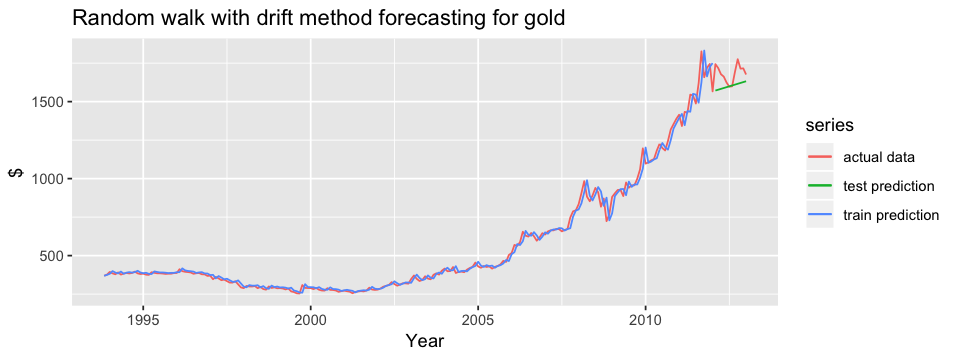

In [15]:
## rwd forecasting for gold
rwd_model <- Arima(train_gold, order = c(0, 1, 0), include.drift = TRUE)

# multi-step forecasting
rwd_frcst <- forecast(rwd_model, h = 12)

model_evaluation(rwd_model, rwd_frcst, train_gold, test_gold)

autoplot(gold, series = 'actual data') +
    autolayer(fitted(rwd_model), series = 'train prediction') +
    autolayer(rwd_frcst$mean, series = 'test prediction') +
    xlab('Year') +
    ylab('$') +
    ggtitle('Random walk with drift method forecasting for gold')

[1] "Training NRMSE :0.193"
[1] "Training MAE :0.785"
[1] "Test NRMSE :1.497"
[1] "Test MAE :3.435"


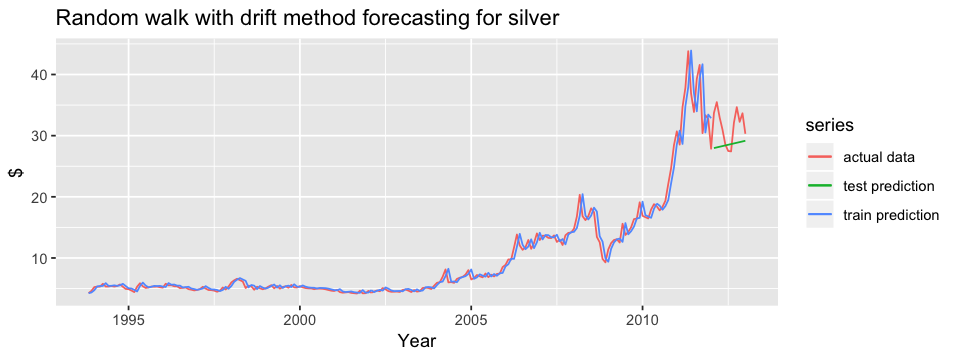

In [16]:
## rwd forecasting for silver
rwd_model <- Arima(train_silver, order = c(0, 1, 0), include.drift = TRUE)

# multi-step forecasting
rwd_frcst <- forecast(rwd_model, h = 12)

model_evaluation(rwd_model, rwd_frcst, train_silver, test_silver)

autoplot(silver, series = 'actual data') +
    autolayer(fitted(rwd_model), series = 'train prediction') +
    autolayer(rwd_frcst$mean, series = 'test prediction') +
    xlab('Year') +
    ylab('$') +
    ggtitle('Random walk with drift method forecasting for silver')